## Setup

### Import Library

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load File

In [4]:
train_claims_json_data = json.load(open("data/train-claims.json"))
dev_claims_json_data = json.load(open("data/dev-claims.json"))
test_claims_json_data = json.load(open("data/test-claims-unlabelled.json"))
evidence_json_data = json.load(open("data/evidence.json"))

label_tags = ["SUPPORTS", "REFUTES", "NOT_ENOUGH_INFO", "DISPUTED"]

In [5]:
train_claims_normalised_data = [{"tag": key,
                                 "claim_text": value["claim_text"],
                                 "evidences":value["evidences"],
                                 "label": value["claim_label"]
                                 } for (key, value) in train_claims_json_data.items()]

dev_claims_normalised_data = [{"tag": key,
                               "claim_text": value["claim_text"],
                               "evidences":value["evidences"],
                               "label": value["claim_label"]
                               } for (key, value) in dev_claims_json_data.items()]

test_claims_normalised_data = [{"tag": key,
                                "claim_text": value["claim_text"]
                                } for (key, value) in test_claims_json_data.items()]

evidence_normalised_data = [{"tag": key,
                             "evidence": value
                             } for (key, value) in evidence_json_data.items()]

train_claims_data = pd.json_normalize(train_claims_normalised_data)
dev_claims_data = pd.json_normalize(dev_claims_normalised_data)
test_claims_data = pd.json_normalize(test_claims_normalised_data)
evidence_data = pd.json_normalize(evidence_normalised_data)

## Dataset Analysis

### Dataset size

In [6]:
print(f"Train set size:    {train_claims_data.shape[0]}")
print(f"Dev set size:      {dev_claims_data.shape[0]}")
print(f"Test set size:     {test_claims_data.shape[0]}")
print(f"Evidence set size: {evidence_data.shape[0]}")


Train set size:    1228
Dev set size:      154
Test set size:     153
Evidence set size: 1208827


### Class distribution

#### Train set

In [7]:
train_cata_0_num = train_claims_data.loc[train_claims_data["label"] == label_tags[0]].shape[0]
train_cata_1_num = train_claims_data.loc[train_claims_data["label"] == label_tags[1]].shape[0]
train_cata_2_num = train_claims_data.loc[train_claims_data["label"] == label_tags[2]].shape[0]
train_cata_3_num = train_claims_data.loc[train_claims_data["label"] == label_tags[3]].shape[0]

In [8]:
print(f"Size of [{label_tags[0]: ^18}] instants: {train_cata_0_num}")
print(f"Size of [{label_tags[1]: ^18}] instants: {train_cata_1_num}")
print(f"Size of [{label_tags[2]: ^18}] instants: {train_cata_2_num}")
print(f"Size of [{label_tags[3]: ^18}] instants: {train_cata_3_num}")

Size of [     SUPPORTS     ] instants: 519
Size of [     REFUTES      ] instants: 199
Size of [ NOT_ENOUGH_INFO  ] instants: 386
Size of [     DISPUTED     ] instants: 124


#### Dev set

In [9]:
dev_cata_0_num = dev_claims_data.loc[dev_claims_data["label"] == label_tags[0]].shape[0]
dev_cata_1_num = dev_claims_data.loc[dev_claims_data["label"] == label_tags[1]].shape[0]
dev_cata_2_num = dev_claims_data.loc[dev_claims_data["label"] == label_tags[2]].shape[0]
dev_cata_3_num = dev_claims_data.loc[dev_claims_data["label"] == label_tags[3]].shape[0]

In [10]:
print(f"Size of [{label_tags[0]: ^18}] instants: {dev_cata_0_num}")
print(f"Size of [{label_tags[1]: ^18}] instants: {dev_cata_1_num}")
print(f"Size of [{label_tags[2]: ^18}] instants: {dev_cata_2_num}")
print(f"Size of [{label_tags[3]: ^18}] instants: {dev_cata_3_num}")

Size of [     SUPPORTS     ] instants: 68
Size of [     REFUTES      ] instants: 27
Size of [ NOT_ENOUGH_INFO  ] instants: 41
Size of [     DISPUTED     ] instants: 18


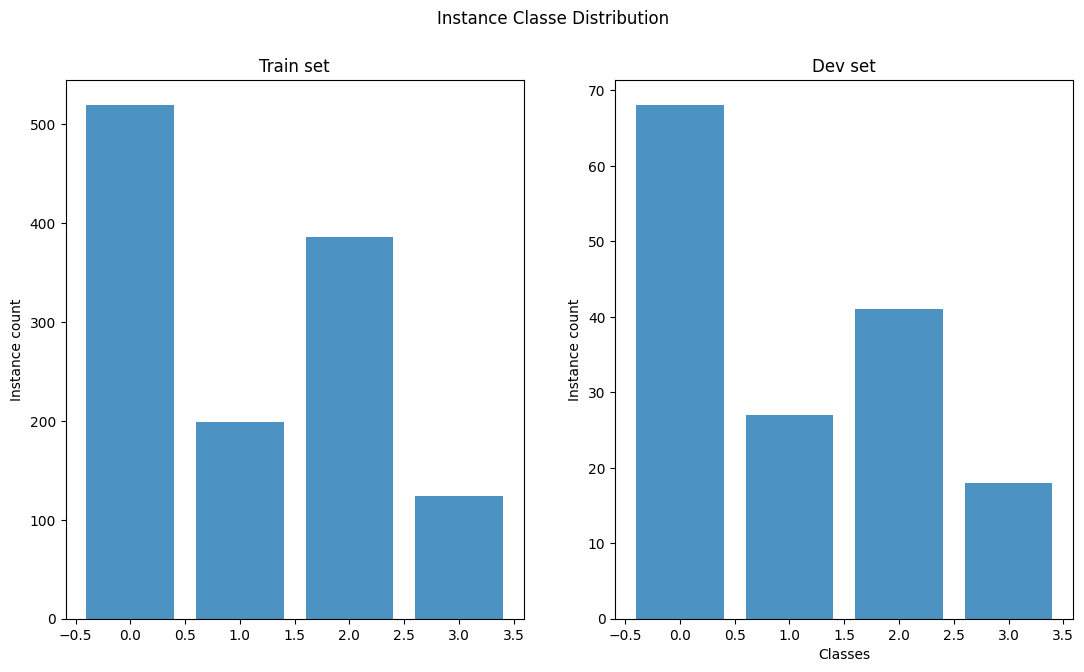

In [30]:
x_pos = np.arange(len(label_tags))
train_instance_num = [train_cata_0_num, train_cata_1_num, train_cata_2_num, train_cata_3_num]
dev_instance_num = [dev_cata_0_num, dev_cata_1_num, dev_cata_2_num, dev_cata_3_num]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,7))
ax1.bar(x_pos, train_instance_num, align='center', alpha=0.8)
ax2.bar(x_pos, dev_instance_num, align='center', alpha=0.8)
ax1.set(ylabel='Instance count', xlabel='', title='Train set')
ax2.set(ylabel='Instance count', xlabel='Classes', title='Dev set')
fig.suptitle('Instance Classe Distribution')

plt.show()

### Claim Text Analysis

#### Train set

In [20]:
train_claims_data["claim_text_len"] = train_claims_data["claim_text"].apply(lambda x: len(x))

print(f"Longest Text:  {train_claims_data['claim_text_len'].max()}")
print(f"Shortest Text: {train_claims_data['claim_text_len'].min()}")
print(f"Average Text Len: {train_claims_data['claim_text_len'].mean(): .4f}")
print(f"Text Len Mode: {train_claims_data['claim_text_len'].mode()[0]}")

Longest Text:  332
Shortest Text: 26
Average Text Len:  122.9552
Text Len Mode: 99


#### Dev set

In [18]:
dev_claims_data["claim_text_len"] = dev_claims_data["claim_text"].apply(lambda x: len(x))

print(f"Longest Text:  {dev_claims_data['claim_text_len'].max()}")
print(f"Shortest Text: {dev_claims_data['claim_text_len'].min()}")
print(f"Average Text Len: {dev_claims_data['claim_text_len'].mean(): .4f}")
print(f"Text Len Mode: {dev_claims_data['claim_text_len'].mode()[0]}")

Longest Text:  406
Shortest Text: 31
Average Text Len:  127.9870
Text Len Mode: 101


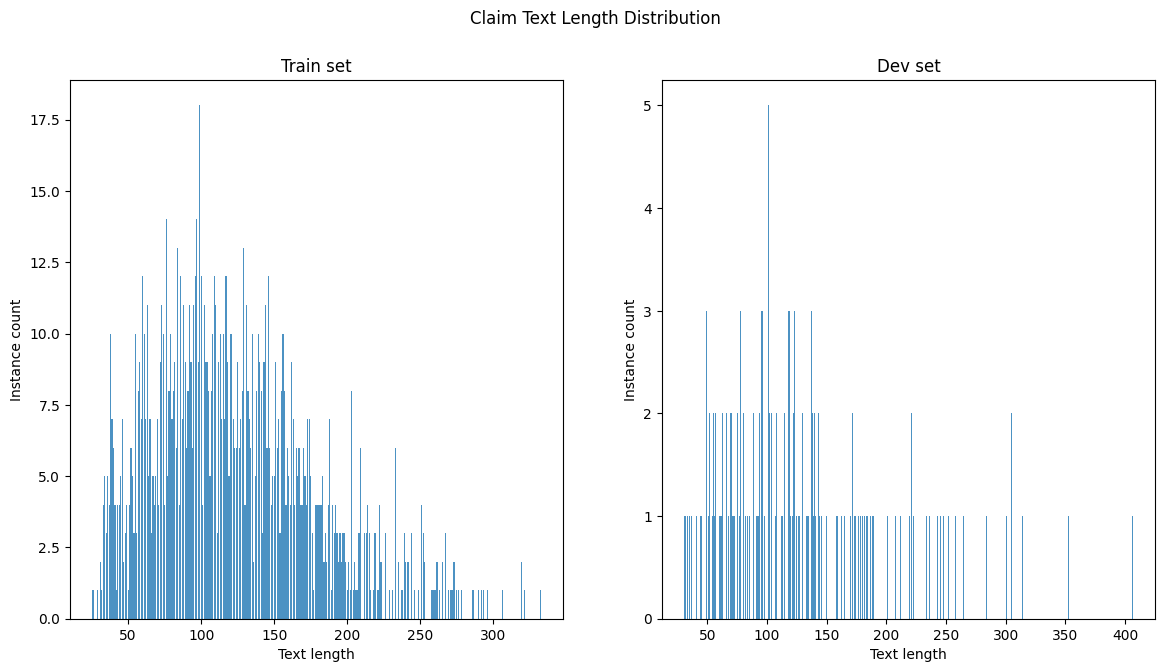

In [31]:
train_claim_len_size_counts = train_claims_data.groupby(by=["claim_text_len"]).size().reset_index(name='counts')
dev_claim_len_size_counts = dev_claims_data.groupby(by=["claim_text_len"]).size().reset_index(name='counts')

X_pos_train = train_claim_len_size_counts["claim_text_len"]
X_pos_dev = dev_claim_len_size_counts["claim_text_len"]
len_count_train = train_claim_len_size_counts["counts"]
len_count_dev = dev_claim_len_size_counts["counts"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
ax1.bar(X_pos_train, len_count_train, align='center', alpha=0.8)
ax2.bar(X_pos_dev, len_count_dev, align='center', alpha=0.8)
ax1.set(ylabel='Instance count', xlabel='Text length', title='Train set')
ax2.set(ylabel='Instance count', xlabel='Text length', title='Dev set')

fig.suptitle('Claim Text Length Distribution')

plt.show()


### Evidence Text Analysis

In [23]:
evidence_data["evidence_length"] = evidence_data["evidence"].apply(lambda x: len(x))

print(f"Longest Text:  {evidence_data['evidence_length'].max()}")
print(f"Shortest Text: {evidence_data['evidence_length'].min()}")
print(f"Average Text Len: {evidence_data['evidence_length'].mean(): .4f}")
print(f"Text Len Mode: {evidence_data['evidence_length'].mode()[0]}")

Longest Text:  3148
Shortest Text: 1
Average Text Len:  119.5141
Text Len Mode: 73


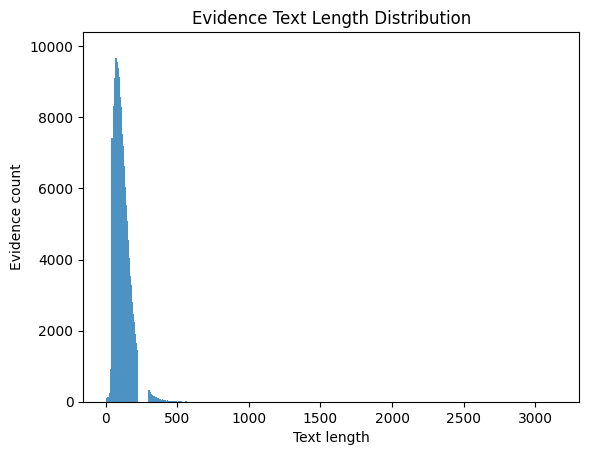

In [33]:
evidence_text_length_counts = evidence_data.groupby(by=["evidence_length"]).size().reset_index(name='counts')

x_pos = evidence_text_length_counts["evidence_length"]
evid_len_count = evidence_text_length_counts["counts"]


plt.bar(x_pos, evid_len_count, align='center', alpha=0.8)
plt.ylabel("Evidence count")
plt.xlabel("Text length")
plt.title("Evidence Text Length Distribution")
plt.show()


### Number of Evidence

In [26]:
train_claims_data["evidence_num"] = train_claims_data["evidences"].apply(lambda x: len(x))
dev_claims_data["evidence_num"] = dev_claims_data["evidences"].apply(lambda x: len(x))

In [27]:
print(f"Most evidence:  {train_claims_data['evidence_num'].max()}")
print(f"Least evidence: {train_claims_data['evidence_num'].min()}")
print(f"Average number of evidences: {train_claims_data['evidence_num'].mean(): .4f}")
print(f"Evidence number Mode: {train_claims_data['evidence_num'].mode()[0]}")

Most evidence:  5
Least evidence: 1
Average number of evidences:  3.3567
Evidence number Mode: 5


In [28]:
print(f"Most evidence:  {dev_claims_data['evidence_num'].max()}")
print(f"Least evidence: {dev_claims_data['evidence_num'].min()}")
print(f"Average number of evidences: {dev_claims_data['evidence_num'].mean(): .4f}")
print(f"Evidence number Mode: {dev_claims_data['evidence_num'].mode()[0]}")

Most evidence:  5
Least evidence: 1
Average number of evidences:  3.1883
Evidence number Mode: 5


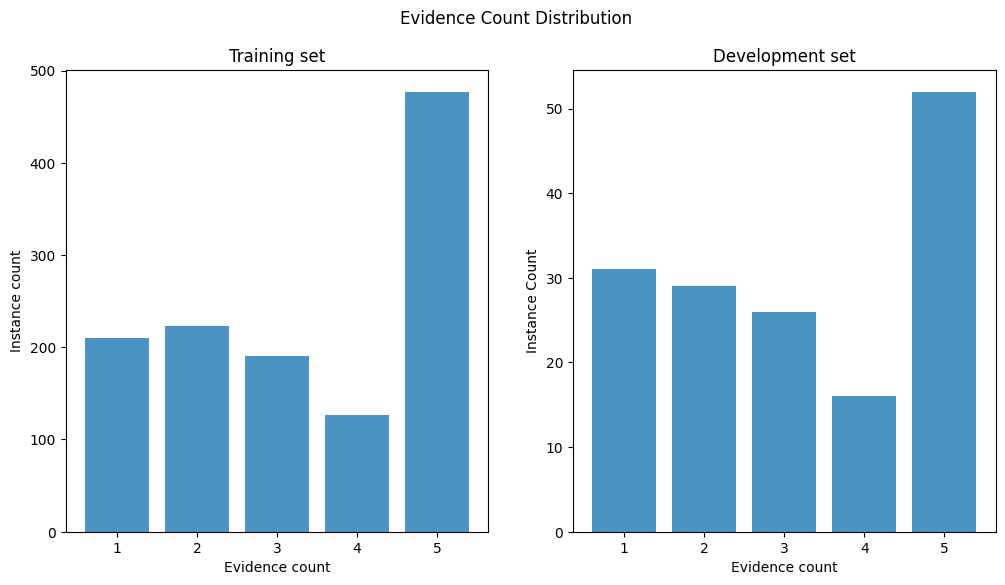

In [29]:
train_claim_evidence_counts = train_claims_data.groupby(by=["evidence_num"]).size().reset_index(name='counts')
dev_claim_evidence_counts = dev_claims_data.groupby(by=["evidence_num"]).size().reset_index(name='counts')

X_pos = train_claim_evidence_counts["evidence_num"]
evid_count_train = train_claim_evidence_counts["counts"]
evid_count_dev = dev_claim_evidence_counts["counts"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.bar(X_pos, evid_count_train, align='center', alpha=0.8)
ax2.bar(X_pos, evid_count_dev, align='center', alpha=0.8)
ax1.set(ylabel='Instance count', xlabel='Evidence count', title='Training set')
ax2.set(ylabel='Instance Count', xlabel='Evidence count', title='Development set')

fig.suptitle('Evidence Count Distribution')

plt.show()